In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IForest import read_data_samples
from sklearn.decomposition import KernelPCA
from sklearn.cluster import Birch, AgglomerativeClustering

In [2]:
%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}

In [3]:
def read_data_samples():

    with open('data/lightcurves.pickle', 'rb') as file:
        lightcurves = pickle.load(file)

    filtered_lcs = lightcurves['pca']
    flux = filtered_lcs['flux_pca']
#     flux = lightcurves['flux']

    return flux

In [4]:
data = read_data_samples()

In [5]:
data.shape

(3873, 300)

In [6]:
PCA_Estimator = KernelPCA(n_components=2, kernel='rbf',
                                gamma=0.001, alpha=0.001,
                                fit_inverse_transform=True,
                                n_jobs=-1)     

In [7]:
transformed_data = PCA_Estimator.fit_transform(data, y=None)

In [8]:
transformed_data.shape

(3873, 2)

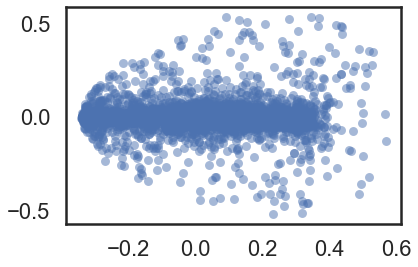

In [9]:
plt.scatter(transformed_data.T[0], transformed_data.T[1], color='b', **plot_kwds)

In [10]:
#clustering = AgglomerativeClustering(n_clusters=5)
brc = Birch(threshold=0.005, n_clusters=5)
print(brc)
brc.fit(transformed_data)
clusters = brc.predict(transformed_data)

Birch(n_clusters=5, threshold=0.005)


In [11]:
clusters.max()

4

In [12]:
clusters.shape

(3873,)

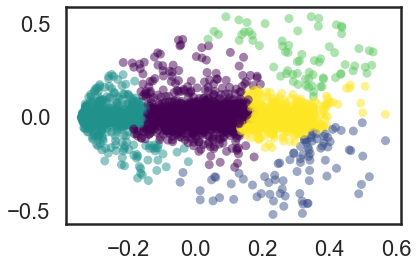

In [13]:
plt.scatter(transformed_data.T[0], transformed_data.T[1], c=clusters,cmap='viridis', **plot_kwds)